<a href="https://colab.research.google.com/github/Qulick-k/algoruthen_test/blob/master/109%E6%BC%94%E7%AE%97%E6%B3%95%E6%9C%9F%E6%9C%AB%E8%80%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**109演算法期末考**

*   每題25分共125分
*   1/13 23:59前完成不扣分;
*   11/14 11:59前減5分;11/14 23:59前減10分；1/15 11:59前減15分;
*   最遲需於1/15 11:59前繳交!
*   請在解題想法區塊寫上解題的想法/思路、所使用的演算法及其原因(最好有推導過程)
*   程式碼需可以執行，且依照題目說明的輸入輸出規範
*   檔名改成 XXX_109演算法期末考.ipynb







第一題：
請從一個整數Array中，找出第K大的元素

Exp：輸入: {5,3,8,2,9,4,6} 
          K=2
    輸出: Ans:8


解題想法：
先用插入排序法，排大小
之後再從串列去取第K大的數字

In [27]:
#程式
def insert_sort(array,k):
    for i in range(1,k):                          #這裡使用插入排序法，把b=[5,3,8,2,9,4,6]排成b=[9,8,6,5,3,4,2]
        for j in range(i,0,-1):
            if array[j] > array[j-1]:
                array[j],array[j-1] = array[j-1],array[j]
            else:
                pass
    for i in range(k,len(array)):                     #
        if array[i] > array[k-1]:
            array[k-1] = array[i]
            for j in range(k-1,0,-1):
                if array[j] > array[j-1]:
                    array[j],array[j-1] = array[j-1],array[j]
                else:
                    pass
    return array[k-1]
        

a = int(input("要輸入幾個數字?:"))
b = []
for i in range(a):
  key = int(input("輸入你要的數字:"))
  b.append(key)
c = int(input("找第K大的數:"))
print(insert_sort(b,c)) 

要輸入幾個數字?:7
輸入你要的數字:5
輸入你要的數字:3
輸入你要的數字:8
輸入你要的數字:2
輸入你要的數字:9
輸入你要的數字:4
輸入你要的數字:6
找第K大的數:2
8


第二題： 找零錢問題
目前有 1,2,5,10 四種面值的硬幣，請算出有總共有幾種方式湊N元?


Exp：輸入N=32，輸出：各種湊出32元的組合



解題想法：

In [24]:
#程式
def for_change(coin,change,dp,newcoin):
  for i in range(1,change+1):
    for j in range(len(coin)):
      if coin[j] <= i:
        if dp[i-coin[j]]+1 < dp[i]:
          dp[i] = dp[i-coin[j]]+1
          tempcoin = coin[j]
        
    print(dp[change])
    newcoin[i] = tempcoin
  

  if dp[change] > change:
    return -1
  else:
    return dp[change]

def oldcoin(change,oldcoin):
  
  re=[]
  while change:
    tmp=oldcoin[change]
    re.append(tmp)
    change-=tmp
    print(re)
  return re 

if __name__ == '__main__':
  coin=[10,5,2,1]
  change= int(input("輸入:"))
  dp=[change+1]*(change+1)
  dp[0]=0
  newcoin=[0]*(change+1)
  

  re = for_change(coin,change,dp,newcoin)
  recoin = oldcoin(change,newcoin)
  print("找錢{0}塊，用了{1}個錢錢，分別為{2}".format(change,re,recoin))

輸入:32
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
4
[10]
[10, 10]
[10, 10, 10]
[10, 10, 10, 2]
找錢32塊，用了4個錢錢，分別為[10, 10, 10, 2]


第三題： 有個小偷到3C用品店偷東⻄,假設他的背包的負重最多可達10公斤,他希望在背包中裝入負重範圍內可得之總價物品,小偷的背包應該怎麼裝才能帶走最有價值的商品?

* 每個商品只有拿走/留著這兩種狀況
* 每個商品不能被切割（如拿1/3個）
* 每個商品也不能被拿超過一次
* 請輸出所選擇的產品之編號，單價，總價，背包總重量


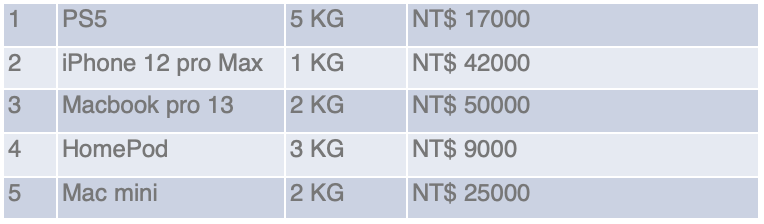








解題想法：

In [18]:
#程式
w= [5 , 1 , 2 , 3 , 2 ]           #重量
v = [17000 , 42000 , 50000 , 9000 , 25000 ] #價值
bagV = 10                    #背包負重
dp = [ [0 for i in range(11) ] for i in range(5) ]             #動態規劃表，建二維陣列
item = [0]*5                 #最漂亮的情況
def findMax(): #動態規劃
    for i in range (5):
        for j in range(bagV+1):
            if j < w[i]:
                dp[i][j] = dp[i - 1][j];
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i - 1][j - w[i]] + v[i]);
def findWhat(i,j): #找最佳解
    if i>=0:
        if dp[i][j] == dp[i-1][j]:
            item[i] = 0
            findWhat(i-1,j)
        elif j - w[i] >= 0 and  dp[i][j] == dp[i - 1][j - w[i]] + v[i]:
            item[i] = 1
            findWhat(i-1,j-w[i])
 
def print1():
    for i in range(5):
        res = []
        for j in range(11):
            res.append(dp[i][j])
        #print(res)
    print("PS5 | iPad pro 12 | Macbook pro 15 | Homepod | Mac mini \n",item)
findMax()
findWhat(4,10)
print1()

PS5 | iPad pro 12 | Macbook pro 15 | Homepod | Mac mini 
 [1, 1, 1, 0, 1]


第四題：請以深度優先搜尋(DFS)、廣度優先搜尋法(BFS)走訪有向圖中的所有節點，並印出兩種搜尋法的走訪順序

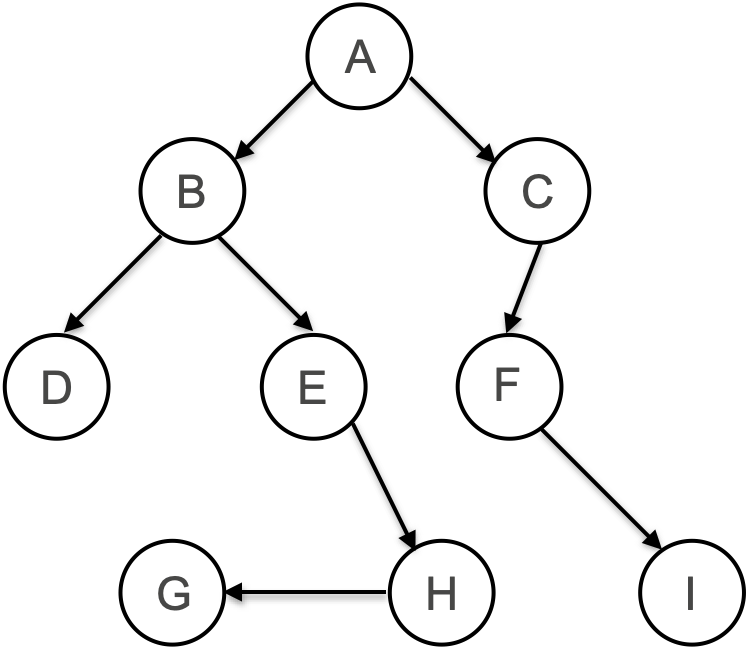

解題想法：
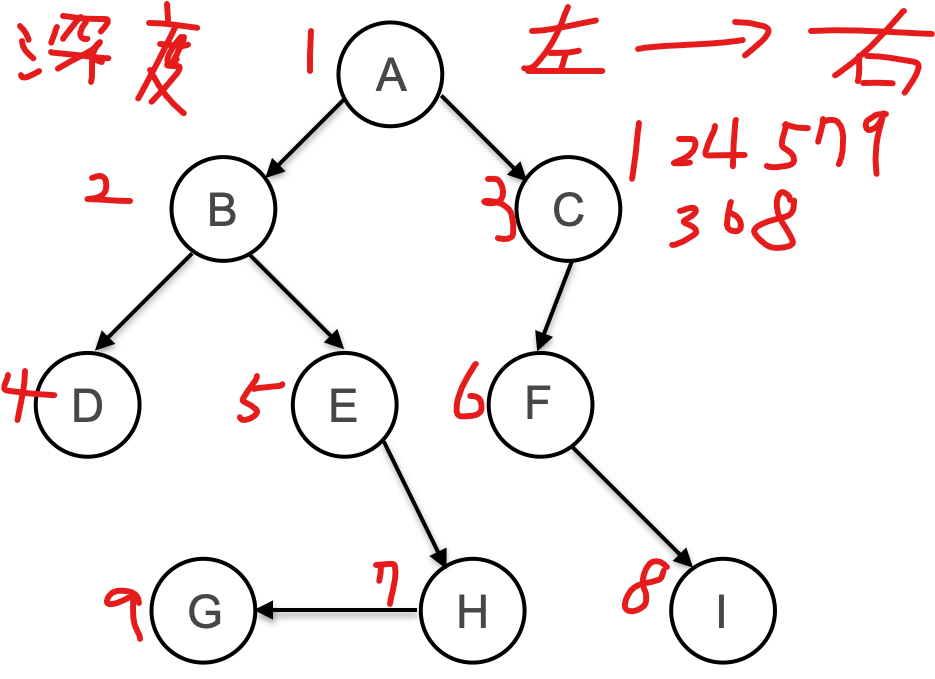


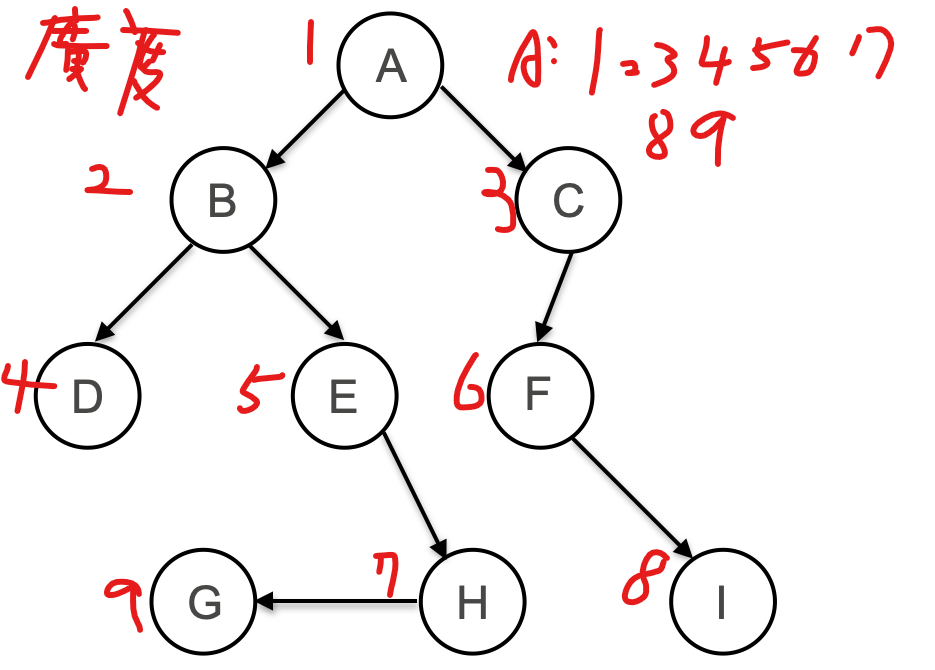

In [2]:
#程式
def enqueue(a, o):
    a.insert(0, o)

def dequeue(a):
    return a.pop()

g = { #  graph: 被搜尋的節點
    '1': {'n':['2','3'], 'v':0}, #  n: neighbor (鄰居), v: visited (是否被訪問過)
    '2': {'n':['4','5'], 'v':0},
    '3': {'n':['6'], 'v':0},
    '4': {'n':[], 'v':0},
    '5': {'n':['7'], 'v':0},
    '6': {'n':['8'], 'v':0},
    '7': {'n':['9'], 'v':0},
    '8': {'n':[], 'v':0},
    '9': {'n':[], 'v':0}
}
    # g = [ node = [ neighbor, visited]]  #123456789=ABCDEFGH

def init(g): #  初始化、設定 visited 為 0
    for i in g:
        g[i]['v'] = 0

def dfs(g, node): #  深度優先搜尋
    if g[node]['v']!=0:           #  如果已訪問過，就不再訪問
        return
    print(node, '=> ', end = '')  #  否則、印出節點
    g[node]['v'] = 1              #    並設定為已訪問
    neighbors = g[node]['n']      # 取出鄰居節點
    for n in neighbors:           #  對於每個鄰居
        dfs(g, n)                 #    逐一進行訪問(遞迴)



queue=['1'] #  BFS 用的 queue, 起始點為 1。

def bfs(g, q): #  廣度優先搜尋
    if len(q)==0:                 #  如果 queue 已空，則返回。
        return
    node = dequeue(q)             #  否則、取出 queue 的第一個節點。
    if g[node]['v'] == 0:         #  如果該節點尚未拜訪過。
        g[node]['v'] = 1          #    標示為已拜訪
    else:                         #  否則 (已訪問過)
        return                    #    不繼續搜尋，直接返回。
    print(node, '=> ', end = '')  #  印出節點
    neighbors = g[node]['n']      #  取出鄰居。
    for n in neighbors: #  對於每個鄰居
        if not g[n]['v']:         #  假如該鄰居還沒被拜訪過
            enqueue(q, n)         #    就放入 queue 中
    bfs(g, q)

print('dfs:', end = '')
init(g)
dfs(g, '1') # 呼叫深度優先搜尋。
print('')

print('bfs:', end = '')
init(g)
bfs(g, queue) # 呼叫廣度優先搜尋。
print('')

dfs:1 => 2 => 4 => 5 => 7 => 9 => 3 => 6 => 8 => 
bfs:1 => 2 => 3 => 4 => 5 => 6 => 7 => 8 => 9 => 


第五題： 請用 Kruskal或Prim 演算法(2選1)找出下圖的最小生成樹，並依照順序寫出加入的每一個邊

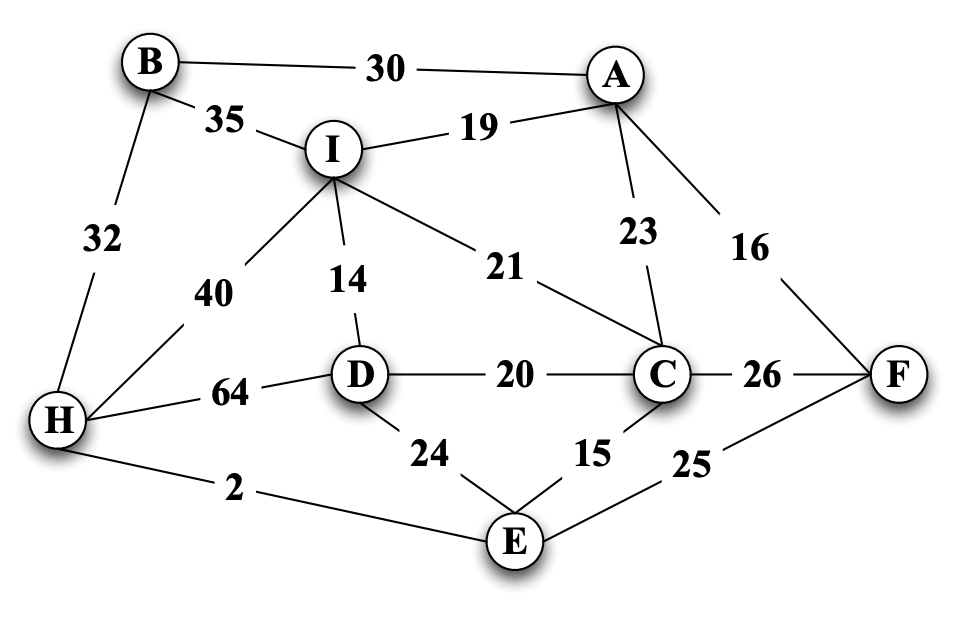

解題想法：

In [25]:
#程式
from functools import reduce


class Edge(object):
    """
    邊 start起點 end終點 weight權重
    """

    def __init__(self, start, end, weight):
        self.start = start
        self.end = end
        self.weight = weight

    def __str__(self):
        return '%s->%s weight=%d' % (self.start, self.end, self.weight)


class MiniTree(object):
    def __init__(self, vertex, weight):
        """
        最小生成樹
        """
        self.vertex = vertex
        self.weight = weight

    def get_all_edges(self):
        all_edges = []
        for s in range(len(self.vertex)):
            for e in range(len(self.vertex)):
                if self.weight[s][e] != 10000:
                    all_edges.append(Edge(s, e, self.weight[s][e]))
        return all_edges

    def disjoin_set_find_root(self, parent_root, start):
        """
        檢查有沒有找到只有一個頂點的終點 
        :return:
        """
        while parent_root[start] != start:
            return self.disjoin_set_find_root(parent_root, parent_root[start])
        return start

    def disjoin_set_union(self, parent_root, start, end):
        """
        整合
        :param parent_root:
        :param start:
        :param end:
        :return:
        """
        start_root = self.disjoin_set_find_root(parent_root, start)
        end_root = self.disjoin_set_find_root(parent_root, end)
        if start_root != end_root:
            parent_root[start_root] = end_root

    def create_min_tree_by_kruskal(self):
        """
        1. 將所有的邊按照權重大小遞增排列  
        2. 建一個陣列selectEdges存在選擇出來的邊 
        3. 檢查已經排好序的邊，如果該邊不構成迴圈，則添加到selectEdges  
        :return:
        """
        # 所有選擇的邊，並升序排列
        all_edges = self.get_all_edges()
        all_edges.sort(key=lambda edge: edge.weight)
        select_edges = []
        parent_root = [i for i in range(len(self.vertex))]
        while len(select_edges) < len(self.vertex) - 1:
            # 判斷根已經選擇了的邊是否造成迴圈，使用到了就判斷
            for edge in all_edges:
                start = edge.start
                end = edge.end
                # 判斷核心是不是造成迴圈，沒構成迴圈，就加入選擇邊  
                if self.disjoin_set_find_root(parent_root, start) != self.disjoin_set_find_root(parent_root, end):
                    select_edges.append(edge)
                    all_edges.remove(edge)
                    self.disjoin_set_union(parent_root, start, end)
        return select_edges


if __name__ == '__main__':
    mini_tree = MiniTree(['A', 'B', 'C', 'D', 'E', 'F', 'H', 'I'],
                         #[   A,   B,   C,   D,   E,   F,   H,   I]
                         [[10000,  30,   23, 10000, 10000,  16,  10000,  19],  #A
                          [ 30, 10000, 10000, 10000, 10000, 10000,   32,  35],  #B    
                          [ 23, 10000, 10000,   20,  15,   26, 10000,  21],  #C  
                          [10000, 10000,  20, 10000,  24,  10000,   64,  14],  #D     
                          [10000, 10000,  15,   24, 10000,  25,   2, 10000],  #E  
                          [ 16, 10000,   26, 10000,  25, 10000,  10000, 10000], #F     
                          [10000,  32, 10000,   64,   2, 10000, 10000,  40],  #H    
                          [ 19,   35,  21,   14, 10000, 10000,   40, 10000]  #I  
                    ])
    min_tree_by_kruskal = mini_tree.create_min_tree_by_kruskal()
    print(reduce(lambda x, y: x + y, map(lambda x: x.weight, min_tree_by_kruskal)))
    for i in min_tree_by_kruskal:
        print('%s->%s weight=%d' % (mini_tree.vertex[i.start], mini_tree.vertex[i.end], i.weight))

116
E->H weight=2
D->I weight=14
C->E weight=15
A->F weight=16
A->I weight=19
C->D weight=20
A->B weight=30
